In [53]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from astropy.io import fits
import glob
from scipy.optimize import curve_fit

In [82]:
def linear(x, m, b):
    return m*x + b

In [83]:
folder = r'C:\Users\Brock\Documents\Git\Research\CCDs\Sophia_QE\20240719\-85'
files = glob.glob(folder + r'\dark_*.fits')

In [84]:
exp_times, dark_counts = [], []

for file in files:
    hdl = fits.open(file)
    data = fits.getdata(file)[0]
    hdr = hdl[0].header
    exp_time = hdr['EXPTIME']

    count = np.sum(data)

    exp_times.append(exp_time)
    dark_counts.append(count)

exp_times = np.array(exp_times, dtype='float32')
dark_counts = np.array(dark_counts, dtype='float32')

ind = np.argsort(exp_times)

exp_times = exp_times[ind]/1000
dark_counts = dark_counts[ind]

In [85]:
npix = 2048*2048
adjusted_counts = dark_counts / npix

In [86]:
popt, pcov = curve_fit(linear, exp_times[-5:], adjusted_counts[-5:])
perr = np.sqrt(np.diag(pcov))
x = np.linspace(1, 2000, 1000)

(600, 625)

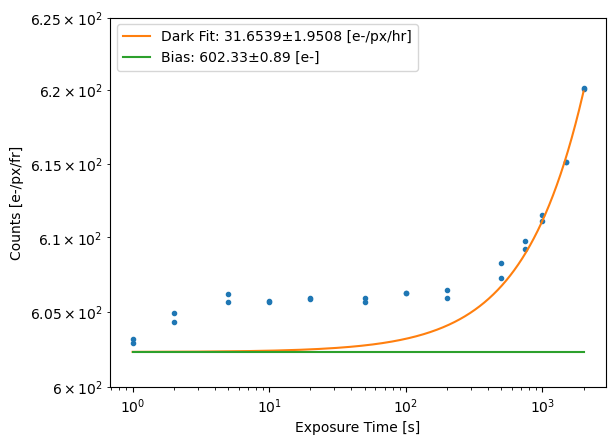

In [94]:
plt.plot(exp_times, adjusted_counts, ls='', marker='.')
plt.plot(x, linear(x, *popt), label='Dark Fit: {:.4f}±{:.4f} [e-/px/hr]'.format(popt[0]*3600, perr[0]*3600))
plt.plot(x, linear(x, 0, popt[1]), label='Bias: {:.2f}±{:.2f} [e-]'.format(popt[1], perr[1]))
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Exposure Time [s]')
plt.ylabel('Counts [e-/px/fr]')
plt.legend(loc = 'upper left')
plt.ylim(600, 625)